In [18]:
import pandas as pd
import json
import matplotlib

exp_json = "./experiment-all.json"

df = pd.read_json(exp_json)
df.to_pickle("experiment.pickle")
df.to_csv("experiment.csv")
#print("Experiment:")
#print(df)

In [2]:
import numpy as np

methods = set(df['method'])
for method in methods:
    print(f"{method}: \t{np.mean(df[df["method"] == method]['best_score']):.8f}",end="")
    print(f" {np.std(df[df["method"] == method]['best_score']):.8f}")

buildingwalk: 	0.00010289 0.00021988
dfs: 	0.00014844 0.00025430
bruteforce: 	0.00016463 0.00026584
hillclimb: 	0.00012884 0.00021650


In [4]:
for method in methods:
    print(f"{method}: \t{np.mean(df[df["method"] == method]['execution_time']):.8f}",end="")
    print(f" {np.std(df[df["method"] == method]['execution_time']):.8f}")

buildingwalk: 	19.65754537 21.51656229
dfs: 	4.94929776 1.97126075
bruteforce: 	30.48284407 26.69146004
hillclimb: 	5.49778644 2.33829718


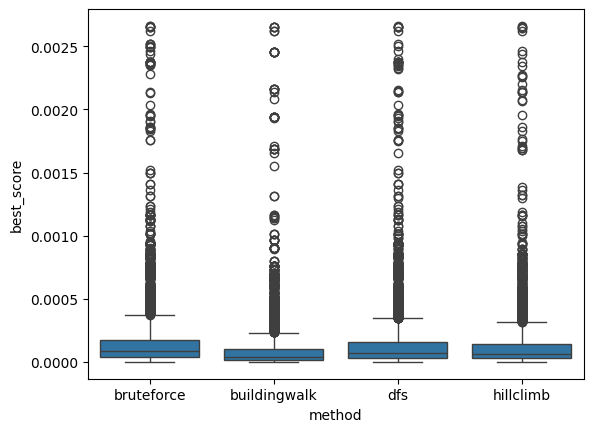

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.boxplot(data=df, x="method", y="execution_time")
sns.boxplot(data=df, x="method", y="best_score")
plt.show()

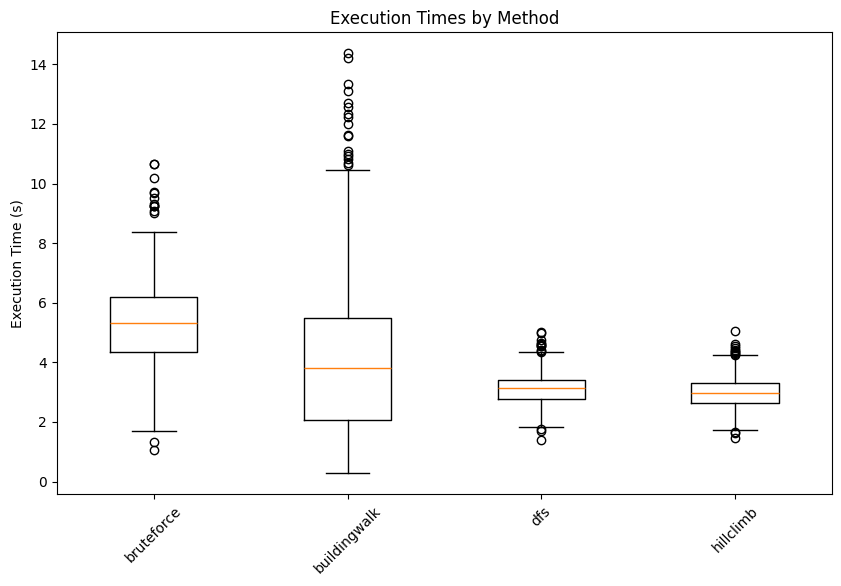

In [54]:
plt.figure(figsize=(10, 6))

methods = df["method"].unique()

data = [
    df[(df["method"] == m) & 
        (df["radius"] == 100) &
        (df["dist_weight"] == 0)
    ]
        ["execution_time"]
    for m in methods
]

plt.boxplot(data, tick_labels=methods)

plt.title("Execution Times by Method")
plt.ylabel("Execution Time (s)")
plt.xticks(rotation=45)

plt.show()

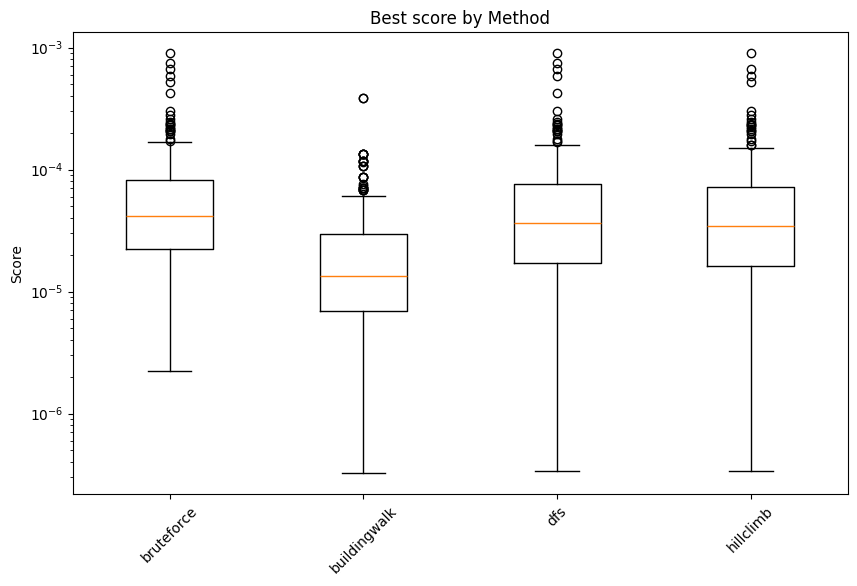

In [62]:
plt.figure(figsize=(10, 6))

methods = df["method"].unique()

data = [
    df[(df["method"] == m) & 
        (df["radius"] == 100) &
        (df["dist_weight"] == 1)
    ]
        ["best_score"]
    for m in methods
]

plt.boxplot(data, tick_labels=methods)
plt.yscale("log")
plt.title("Best score by Method")
plt.ylabel("Score")
plt.xticks(rotation=45)

plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

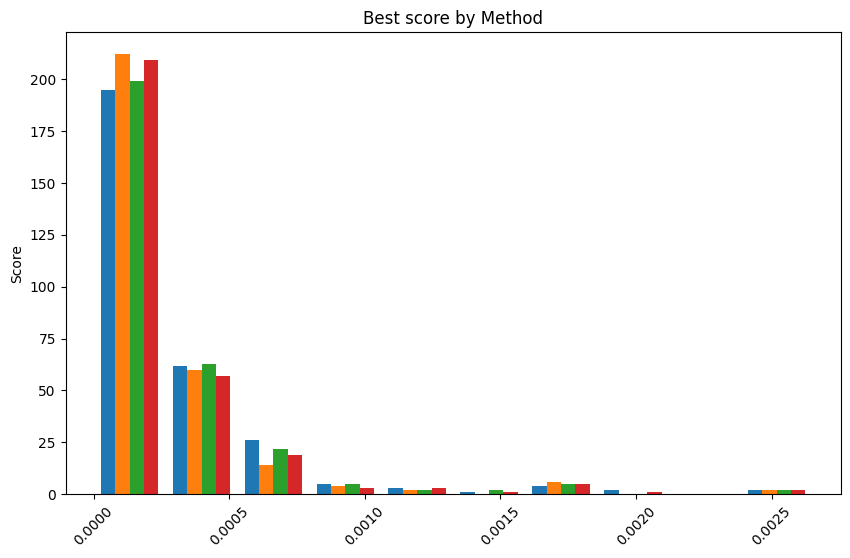

In [59]:
plt.figure(figsize=(10, 6))
#print(df)
methods = df["method"].unique()

data = [
    df[(df["method"] == m) & 
        (df["radius"] == 100) &
        (df["dist_weight"] == 0)
    ]
        ["best_score"]
    for m in methods
]

plt.hist(data)

plt.title("Best score by Method")
plt.ylabel("Score")
plt.xticks(rotation=45)

plt.show()